# 実践演習10-5

scikit-learnで識別にアンサンブル学習を適用します。

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

breast_cancerデータを読み込んでX, yに格納後、概要を表示します。

In [2]:
bc = load_breast_cancer()
X = bc.data
y = bc.target
print(bc.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

主成分分析を行い、その結果を表示します。

[0.98204467 0.01617649]


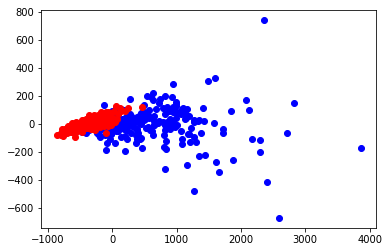

In [3]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) 
X2 = pca.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1], 'bo')
plt.plot(X2[y==1,0], X2[y==1,1], 'ro')

## バギング

base_estimator引数で識別器を指定します。Noneの場合は決定木になります。

In [4]:
clf1 = ensemble.BaggingClassifier()
clf1.fit(X, y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

交差確認法で評価します。

In [5]:
scores = cross_val_score(clf1, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

94.20 +/- 3.51 %


## ランダムフォレスト

In [6]:
clf2 = ensemble.RandomForestClassifier()
clf2.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

交差確認法で評価します。

In [7]:
scores = cross_val_score(clf2, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

95.27 +/- 3.19 %


## Adaブースト

In [8]:
clf3 = ensemble.AdaBoostClassifier()
clf3.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

交差確認法で評価します。

In [9]:
scores = cross_val_score(clf3, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

95.96 +/- 1.77 %


## 勾配ブースティング

In [10]:
clf4 = ensemble.GradientBoostingClassifier()
clf4.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

交差確認法で評価します。

In [11]:
scores = cross_val_score(clf4, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

96.15 +/- 2.55 %


### 補足

特徴の重要性を確認するコード

Feature ranking:
1. mean radius (0.109723)
2. mean texture (0.091134)
3. mean perimeter (0.088928)
4. mean area (0.082081)
5. mean smoothness (0.073542)
6. mean compactness (0.064994)
7. mean concavity (0.047973)
8. mean concave points (0.036066)
9. mean symmetry (0.035347)
10. mean fractal dimension (0.035208)
11. radius error (0.033478)
12. texture error (0.028364)
13. perimeter error (0.028164)
14. area error (0.026470)
15. smoothness error (0.024825)
16. compactness error (0.023039)
17. concavity error (0.022754)
18. concave points error (0.022085)
19. symmetry error (0.021558)
20. fractal dimension error (0.017361)
21. worst radius (0.014112)
22. worst texture (0.013703)
23. worst perimeter (0.013332)
24. worst area (0.011831)
25. worst smoothness (0.008835)
26. worst compactness (0.007592)
27. worst concavity (0.006819)
28. worst concave points (0.005656)
29. worst symmetry (0.003817)
30. worst fractal dimension (0.001207)


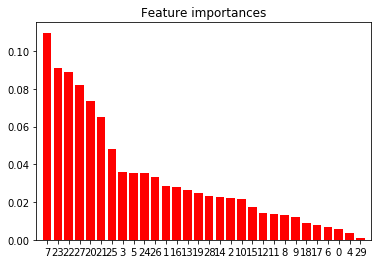

In [12]:
importances = clf4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, bc.feature_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()